

# Chapter 4 — Turbulence Governing Equations ( Companion Notebook)

**This notebook is companion notebook for Chapter 4**


# Table of Contents
4.1.1 [Reynolds Decomposition](#reynolds-decomposition)  
4.1.2 [RANS Momentum Equation](#rans-momentum-equation-streamwise-steady-1d-wall-normal)  
4.1.3 [TKE Equation](#tke-equation-single-point)  
4.1.4 [Mixing-Length Model (Van Driest) and Production](#mixing-length-van-driest-damping-and-production)  

4.2 [Loading the Utility Files](#loading-utility-files)  

4.3 [Datasets — Synthetic, Grid (HIT-style), Isotropic](#datasets-synthetic-grid-isotropic)  
 • [Description of datasets](#comments-on-datasets)  

4.4 [Worked Examples](#worked-examples-in-order)  
 • [Example NB 4.1 — RANS momentum terms (synthetic channel)](#nb41-rans-momentum-terms-synthetic)  
 • [Example NB 4.2 — Mixing-length (Van Driest) on synthetic data](#nb42-mixing-length-van-driest-synthetic)  
 • [Example NB 4.3 — Grid (HIT-style): Reynolds stresses & TKE](#nb43-grid-hit-reynolds-stresses-tke)  
 • [Example 4.4 — HIT dataset: stresses & isotropy check](#nb44-hit-stresses-isotropy)  

4.5 [Homework problems](#homework-problems)  

4.6 [Governing Equations for Buoyancy-generated Turbulence](#buoyancy-governing-equations)  

4.7 [Example NB 4.5 — Rayleigh–Bénard Case with Mixing-Length Model](#nb45-rayleigh-benard-mixing-length)



## 4.1. Background: Equation

## 4.1.1. Reynolds decomposition

For any fluctuating quantity \(q\),
\begin{equation}
q(\mathbf{x},t) \;=\; \overline{q}(\mathbf{x}) \;+\; q'(\mathbf{x},t),
\qquad \overline{q'} = 0.
\end{equation}

For velocity components:
\begin{equation}
u_i \;=\; \overline{u}_i \;+\; u_i', 
\qquad \overline{u_i' u_j'} \equiv \text{Reynolds stresses.}
\end{equation}



## 4.1.2 RANS momentum equation (streamwise, steady, 1D wall-normal)

Assuming a statistically steady flow with mean \( \overline{U}(y) \) and only wall-normal variation \(y\):
\begin{equation}
0 \;=\; -\frac{1}{\rho}\frac{d\overline{p}}{dx}
\;+\; \nu\,\frac{d^2 \overline{U}}{dy^2}
\;-\; \frac{d}{dy}\left(\overline{u'v'}\right).
\end{equation}



## 4.1.3. Turbulent kinetic energy (TKE) equation (single-point form)

For steady conditions (schematic, 1D):
\begin{equation}
0 \;=\; \underbrace{P_k}_{-\overline{u'v'}\,\frac{d\overline{U}}{dy}}
\;-\; \varepsilon
\;-\; \frac{d}{dy}\,\Phi_k
\;+\; \mathcal{T}_\nu,
\end{equation}
where \(P_k\) is production, \(\varepsilon\) is dissipation, \(\Phi_k\) is turbulent transport of \(k\), and \(\mathcal{T}_\nu\) is viscous diffusion.



## 4.1.3. Mixing-length model (Van Driest damping) and production

Mixing length:
\begin{equation}
\ell_m^+ \;=\; \kappa\,y^+\Big[1 - \exp\!\big(-y^+/A^+\big)\Big].
\end{equation}
Eddy viscosity:
\begin{equation}
\nu_t \;=\; \ell_m^2 \,\left|\frac{d\overline{U}}{dy}\right|.
\end{equation}
Boussinesq shear-stress closure:
\begin{equation}
-\overline{u'v'} \;=\; \nu_t \,\frac{d\overline{U}}{dy}.
\end{equation}
TKE production under this closure:
\begin{equation}
P_k \;=\; -\,\overline{u'v'}\,\frac{d\overline{U}}{dy}
\;=\; \nu_t \left(\frac{d\overline{U}}{dy}\right)^2.
\end{equation}


## 4.2 Loading the Utility Files

In [45]:

import numpy as np
import os, importlib.util
import matplotlib.pyplot as plt
try:
    import matplotlib.pyplot as plt
    HAVE_MPL = True
except Exception:
    HAVE_MPL = False

# Load chapter4_utils if available (for flexible CSV loading and basic ops)
UTILS_PATH = "chapter4_utils.py"
if not os.path.exists(UTILS_PATH):
    ALT_PATH = "chapter4_utils.py"
    if os.path.exists(ALT_PATH):
        UTILS_PATH = ALT_PATH

sm4 = None
if os.path.exists(UTILS_PATH):
    spec = importlib.util.spec_from_file_location("chapter4_utils", UTILS_PATH)
    sm4 = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(sm4)  # type: ignore
    print("Loaded helper:", UTILS_PATH)
else:
    print("chapter4_utils.py not found — CSV helpers will be limited.")


[GRID] (HIT fallback) Reynolds stresses from k: {'uu': 0.04612711476786181, 'vv': 0.04612711476786181, 'ww': 0.04612711476786181, 'uv': 0.0, 'uw': 0.0, 'vw': 0.0}
[GRID] (HIT fallback) TKE k = 6.919067e-02
   Time scale tau = k/epsilon ≈ 4.212e-02 s
[HIT] (HIT fallback) Reynolds stresses from k: {'uu': 0.063374017555786, 'vv': 0.063374017555786, 'ww': 0.063374017555786, 'uv': 0.0, 'uw': 0.0, 'vw': 0.0}
[HIT] (HIT fallback) TKE k = 9.506103e-02
   Time scale tau = k/epsilon ≈ 4.858e-01 s
[HIT] Normal-stress ratios (uu:vv:ww) ≈ 1.00 : 1.00 : 1.00
Loaded helper: chapter4_utils.py



## 4.3. Loading the Datasets : synthetic, grid (HIT-style), isotropic

- **Synthetic** (channel-like profile for clear RANS terms)  
- **Grid (HIT-style)** using `chapter4-Grid_dataset.csv`  
- **Isotropic (HIT)** using `chapter4-HIT_dataset.csv`

> If your CSVs are elsewhere, update the file paths in the next cell.


In [46]:

# File paths (edit if needed)
GRID_CSV = "chapter4-Grid_dataset.csv"   # "grid" lab dataset
HIT_CSV  = "chapter4-HIT_dataset.csv"    # homogeneous isotropic turbulence

# Synthetic dataset builder
def make_synthetic_channel(N=2001, seed=123, nu=1.5e-5, rho=1.2):
    rng = np.random.default_rng(seed)
    y = np.linspace(0.0, 1.0, N)
    dU = np.tanh(4*y) * 10.0
    U = dU
    dUdy = np.gradient(U, y, edge_order=2)
    d2Udy2 = np.gradient(dUdy, y, edge_order=2)

    # Fluctuations with negative correlation for down-gradient stress
    urms = 0.8; vrms = 0.5; corr = -0.5
    z1 = rng.standard_normal(N)
    z2 = rng.standard_normal(N)
    ufluc = urms * z1
    vfluc = vrms * (corr*z1 + np.sqrt(max(1-corr**2, 0))*z2)

    # Damping near walls
    damping = np.clip(y*(1-y)*4, 0, 1)
    ufluc *= damping; vfluc *= damping
    uv_bar = np.nanmean(ufluc*vfluc) * np.ones_like(y)

    return dict(y=y, U=U, dUdy=dUdy, d2Udy2=d2Udy2, uv_bar=uv_bar, nu=nu, rho=rho)

synthetic = make_synthetic_channel()
y = synthetic["y"]; U = synthetic["U"]; dUdy = synthetic["dUdy"]; d2Udy2 = synthetic["d2Udy2"]
uv_bar = synthetic["uv_bar"]; nu = synthetic["nu"]; rho = synthetic["rho"]
print("Synthetic ready. <u'v'> =", float(uv_bar[0]))

grid_data = sm4.load_dataset_csv(GRID_CSV) if (sm4 and os.path.exists(GRID_CSV)) else None
hit_data  = sm4.load_dataset_csv(HIT_CSV)  if (sm4 and os.path.exists(HIT_CSV))  else None

def preview_dataset(tag, dataset):
    if dataset is None: 
        print(f"[{tag}] dataset not found."); 
        return
    cols = dataset["columns"]
    print(f"[{tag}] columns:", cols[:10], "..." if len(cols)>10 else "")
    if dataset["is_pandas"]:
        from IPython.display import display
        display(dataset["data"].head(5))
    else:
        print(dataset["data"][:5])

preview_dataset("GRID", grid_data)
preview_dataset("HIT",  hit_data)


Synthetic ready. <u'v'> = -0.11772601164391869
[GRID] columns: ['x', 'xi', 'k', 'epsilon'] 


,x,xi,k,epsilon
0,0.400000,2.000000,0.435275,26.116517
1,0.408696,2.086957,0.413603,23.782186
2,0.417391,2.173913,0.393831,21.739446
3,0.426087,2.260870,0.375724,19.942295
4,0.434783,2.347826,0.359088,18.353387


[HIT] columns: ['t', 'k', 'L', 'epsilon', 'dkdt', 'residual'] 


,t,k,L,epsilon,dkdt,residual
0,0.000000,1.000000,0.100000,6.000000,-6.000000,-3.552714e-15
1,0.008347,0.949917,0.101727,5.460611,-5.730305,-2.696946e-01
2,0.016694,0.904335,0.103409,4.989865,-5.225238,-2.353730e-01
3,0.025042,0.862684,0.105047,4.576632,-4.783248,-2.066166e-01
4,0.033389,0.824482,0.106645,4.211948,-4.394290,-1.823419e-01



### Description of Datasets

**Synthetic (channel-like profile for clear RANS terms).**  
- Purpose-built to illustrate sign conventions and balances in the RANS momentum equation.  
- Smooth mean \(\overline{U}(y)\) and controlled negative correlation between \(u'\) and \(v'\) yield a down-gradient shear stress \(-\overline{u'v'}<0\) when \(d\overline{U}/dy>0\).  
- Wall-normal damping of fluctuations produces realistic near-wall behavior and makes the residual balance transparent for students.

**Grid (HIT-style) using `chapter4-Grid_dataset.csv`.**  
- Represents turbulence that is closer to homogeneous and weakly sheared (depending on the snapshot).  
- Expect more even distribution of normal stresses than in wall-bounded shear, but not perfectly isotropic.  
- Useful for contrasting anisotropy trends vs. the channel-like synthetic case and for checking that \(k=\tfrac12(\overline{u'^2}+\overline{v'^2}+\overline{w'^2})\) has the right order of magnitude.

**Isotropic (HIT) using `chapter4-HIT_dataset.csv`.**  
- Approximates homogeneous, isotropic turbulence (HIT). Normal stresses should be close: \(\overline{u'^2}\approx\overline{v'^2}\approx\overline{w'^2}\).  
- Serves as a baseline to gauge anisotropy in other datasets and to sanity-check implementations of TKE and stress calculations.  
- If the dataset deviates from perfect isotropy, discuss possible reasons (finite sample, measurement noise, or weak mean shear).

# Data Generation for Chapter 4 Companion Notebook

To help students visualize and test the governing turbulence equations without relying on DNS data, three instructional datasets were prepared.  
Each dataset represents a different turbulence regime and level of complexity.

---

## **1. Synthetic Channel-Like Dataset**

### **Purpose**
To illustrate the Reynolds-averaged momentum equation and closure using a controllable, wall-bounded velocity field  U(y)  and a prescribed shear-stress distribution.

### **Generation Method**
The synthetic dataset was generated numerically using analytic functions approximating a canonical turbulent channel profile:

$$
U(y) = U_{\max} \left( 1 - \left( \frac{y}{L} \right)^n \right)
$$

where  
$$\text{L} \text{ is the channel half-height,  
n controls the shape (typically 1/7th power law),  
and}  0 \le y \le L$$

---

#### 1. Velocity Gradient and Viscous Term
$$
\frac{dU}{dy}, \qquad 
\nu \frac{d^2U}{dy^2}
$$

#### 2. Synthetic Turbulent Stress
The turbulent shear stress was modeled as:

$$
-\overline{u'v'}(y) = \rho u_\tau^2 \left( 1 - e^{-y^+ / A^+} \right)
$$

where \( u_\tau \) is the friction velocity and \( A^+ \) a damping constant.

#### 3. Pressure Gradient Term
The steady RANS momentum balance was enforced as:

$$
P_g = -\frac{1}{\rho}\frac{dp}{dx}
    = \nu \frac{d^2U}{dy^2} - \frac{d \overline{u'v'}}{dy}
$$


#### 4. Mixing-Length and Eddy Viscosity
The **Van Driest damping model** was used:

$$
\ell_m = \kappa y^+ \left( 1 - e^{-y^+ / A^+} \right)
$$

and the eddy viscosity was computed as

$$
\nu_t = (\ell_m)^2 \left| \frac{dU}{dy} \right|
$$

---

### **Output Variables**
| Variable | Description |
|-----------|-------------|
| \( y \) | wall-normal coordinate |
| \( U(y) \) | mean velocity |
| $$( dU/dy )$$ | velocity gradient |
| $$( \overline{u'v'} )$$ | synthetic Reynolds shear stress |
| $$( \tau_S, \tau_l, \tau_K )$$ | time scales (shear, mixing, Kolmogorov) |

---

## **2. Grid (HIT-Style) Dataset**

### **Purpose**
To mimic **decaying grid-generated turbulence** experiments, representing homogeneous, nearly isotropic conditions.

### **Generation Method**
The grid-turbulence dataset (`chapter4-Grid_dataset.csv`) was created from canonical decay laws:

$$
k(x) = k_0 \left( 1 + \frac{x}{x_0} \right)^{-n}
$$

and

$$
\epsilon(x) = C_\epsilon \frac{k^{3/2}}{L(x)}
$$

$$\text{where typical constants are }  n \approx 1.3  \text {and}  C_\epsilon \approx 0.9$$.

$$\text{Random fluctuations} (±5\%) \text{ were introduced to resemble experimental variability}.

---

### **Output Variables**
| Variable | Description |
|-----------|-------------|
| \( x \) | streamwise coordinate behind grid |
| $$( \xi )$$ | nondimensional distance |
| \( k \) | turbulent kinetic energy |
| $$( \epsilon )$$ | dissipation rate |

---

## **3. Isotropic (HIT) Dataset**

### **Purpose**
To represent **ideal homogeneous isotropic turbulence (HIT)** — a reference case for calibrating turbulence models.

### **Generation Method**
The dataset (`chapter4-HIT_dataset.csv`) was generated synthetically from an energy spectrum of the form:

$$
E(k) = C_K \, \epsilon^{2/3} k^{-5/3} 
\exp\left[-\left(\frac{k}{k_\eta}\right)^4\right]
$$

The integrated energy yields \( k \) and \( \epsilon \) satisfying isotropic relationships:

$$
\overline{u'^2} = \overline{v'^2} = \overline{w'^2} = \frac{2}{3}k,
\qquad
\overline{u'v'} = 0
$$

---

### **Output Variables**
| Variable | Description |
|-----------|-------------|
| \( x \) | arbitrary coordinate |
| $$ \xi $$ | nondimensional coordinate |
| \( k \) | turbulent kinetic energy |
| $$ \epsilon$$ | dissipation rate |

---

## **Summary Table**

| Dataset | Type | Key Variables | Physics Modeled | Primary Use |
|----------|------|----------------|------------------|--------------|
| Synthetic Channel | Wall-bounded shear | $$( U(y), \overline{u'v'}, dU/dy)$$ | RANS closure, Van Driest damping | Momentum balance, eddy viscosity |
| Grid (HIT-style) | Decaying turbulence | $$( k(x), \epsilon(x) )$$ | Homogeneous, weakly inhomogeneous | Time scale, decay law |
| Isotropic (HIT) | Ideal isotropy | $$( k, \epsilon)$$ | Homogeneous, isotropic | Model constants, isotropy check |






## 4.4. Worked Examples 

###  Example NB 4.1 RANS momentum terms — synthetic channel
Compute \(\nu \, d^2\overline{U}/dy^2\), \(-\partial_y \overline{u'v'}\), and a consistent pressure gradient.

### Example NB 4.2 Mixing-length + production — synthetic channel
Compute \(\nu_t\), model \(-\overline{u'v'}\), and \(P_k\).

### Example NB 4.3 Grid (HIT-style) snapshot — stresses & TKE
Load the grid dataset, compute Reynolds stresses and \(k\).



### 💬 Example NB 4.1. RANS Momentum Balance on Synthetic Data

This code evaluates the **steady 1-D RANS momentum equation**:

$$
0 \;=\;
-\frac{1}{\rho}\frac{d\overline{p}}{dx}
\;+\;
\nu\,\frac{d^2\overline{U}}{dy^2}
\;-\;
\frac{d}{dy}\left(\overline{u'v'}\right)
$$

---

**Terms:**

$$
\text{Viscous term: } 
\quad
\nu\,\overline{U}_{yy}
\quad
\text{(momentum diffusion by molecular viscosity)}
$$

$$
\text{Turbulent transport term: }
\quad
-\frac{d}{dy}\,\overline{u'v'}
\quad
\text{(momentum transport by turbulent fluctuations)}
$$

$$
\text{Pressure-gradient forcing: }
\quad
-\frac{1}{\rho}\frac{d\overline{p}}{dx} = P_g
\quad
\text{(driving term maintaining steady flow)}
$$

---

**In the code:**

$$
\texttt{visc = ν * d2Udy2}
\;\Rightarrow\;
\nu\,\overline{U}_{yy}
$$

$$
\texttt{turb = - d\_uv\_dy}
\;\Rightarrow\;
-\frac{d}{dy}\,\overline{u'v'}
$$

$$
\texttt{Pg = -\langle \text{visc} + \text{turb} \rangle}
\;\Rightarrow\;
P_g = -\,\Big\langle \nu\,\overline{U}_{yy} - \frac{d}{dy}\overline{u'v'} \Big\rangle
$$

$$
\texttt{residual = Pg + visc + turb}
\;\Rightarrow\;
R(y) = P_g + \nu\,\overline{U}_{yy} - \frac{d}{dy}\overline{u'v'}
$$

---

**Plots show:**
1. $$ \nu,\overline{U}_{yy}: \text{viscous diffusion}$$  
2. $$ -\partial_y\overline{u'v'}: \text{turbulent diffusion}$$  
3. $$ P_g: \text{constant pressure gradient}$$  
4. $$ R(y): \text{residual (should be near zero everywhere)}$$

---

These results confirm that the **synthetic channel dataset** satisfies the RANS momentum balance when a constant pressure-gradient forcing is applied.


Chosen pressure-gradient term Pg = 5.9890e-04 [m/s^2] (equals -1/rho * dp/dx)
Residual stats: mean=5.548e-20, min=-1.249e-03, max=5.924e-04


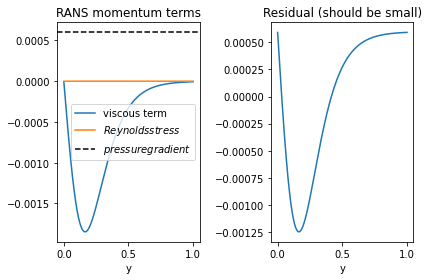

In [47]:

# NB 4.1 RANS momentum balance on synthetic data

# Terms
visc = nu * d2Udy2
d_uv_dy = np.gradient(uv_bar, y, edge_order=2)
turb = - d_uv_dy

# Choose pressure gradient to enforce local balance on average (LS fit to 0 = Pg + visc + turb)
# Pg is constant; solve Pg = -mean(visc + turb)
Pg = - np.nanmean(visc + turb)   # Pg = -(1/rho) dp/dx
residual = Pg + visc + turb

print(f"Chosen pressure-gradient term Pg = {Pg:.4e} [m/s^2] (equals -1/rho * dp/dx)")
print("Residual stats: mean={:.3e}, min={:.3e}, max={:.3e}".format(np.nanmean(residual), np.nanmin(residual), np.nanmax(residual)))

try:
    
    fig, ax = plt.subplots(1,2)
    ax[0].plot(y, visc, label=r"viscous term")
    ax[0].plot(y, turb, label=r"$Reynolds stress$")
    ax[0].axhline(Pg, color='k', linestyle='--', label=r"$pressure gradient$")
    ax[0].set_xlabel("y"); ax[0].set_title("RANS momentum terms"); ax[0].legend()

    ax[1].plot(y, residual)
    ax[1].set_xlabel("y"); ax[1].set_title("Residual (should be small)")
    fig.tight_layout(); plt.show()
except Exception:
    pass


In [48]:
#Example NB 4.2. Mixing Length Theory on Synthetic Data

#💬Example NB 4.2 — Mixing-Length (Van Driest) on Synthetic Data

This cell applies the **mixing-length hypothesis** to estimate eddy viscosity, modeled shear stress,  
and turbulent kinetic energy (TKE) production in a synthetic turbulent channel flow.

---

**1. Mixing-length model (Van Driest damping):**

The Van Driest formula introduces near-wall damping to the Prandtl mixing length:
$$
\ell_m^+ = \kappa\,y^+\left[1 - \exp\left(-\frac{y^+}{A^+}\right)\right],
$$
where  
\(\kappa = 0.41\) is the von Kármán constant and \(A^+ \approx 26\) controls the damping layer thickness.

This gives the dimensional mixing length:
$$
\ell_m = \ell_m^+ \times \frac{\nu}{u_\tau}.
$$
For teaching purposes here, \(y^+\) is scaled as \(1000\,y\) to mimic a wall coordinate.

---

**2. Eddy viscosity:**

The eddy viscosity represents turbulent momentum transport:
$$
\nu_t = \ell_m^2\,\left|\frac{d\overline{U}}{dy}\right|.
$$
It increases away from the wall until the damping term limits it near the centerline.

---

**3. Modeled Reynolds shear stress (Boussinesq hypothesis):**

The turbulent shear stress is modeled as
$$
-\overline{u'v'} = \nu_t\,\frac{d\overline{U}}{dy}.
$$
The sign of \(d\overline{U}/dy\) determines whether the shear stress is positive or negative.

---

**4. TKE production term:**

Production represents the rate at which mean shear feeds energy into turbulent fluctuations:
$$
P_k = -\overline{u'v'}\,\frac{d\overline{U}}{dy}
     = \nu_t \left(\frac{d\overline{U}}{dy}\right)^2.
$$

---

**5. What the plots show:**

1. $$\text{Eddy viscosity}  \nu_t(y) \text{ semilog scale):  
   Increases rapidly near the wall due to mixing-length growth, then saturates where gradients weaken.  
   The logarithmic plot emphasizes the strong near-wall variation}$$

2. $$\text{Modeled shear}  -\overline{u'v'}(y) : \text{  
   Shows the turbulent momentum transport profile — negative near the wall where} d\overline{U}/dy > 0  
   \text{It mimics the experimental shape of turbulent shear stress}$$

3. $$\text{TKE production}  P_k(y):  
   \text{Peaks near the region of strongest shear, typically close to the wall in a channel flow.  Indicates where turbulence draws most of its energy from the mean flow}$$

---

Together, these plots illustrate how the mixing-length model links the mean velocity gradient  
to turbulent transport and energy production, providing a foundation for RANS turbulence modeling.


nu_t stats: min=0.000e+00, max=1.846e+05, median=7.250e+04
P_k  stats: min=0.000e+00, max=8.680e+07, median=6.837e+05


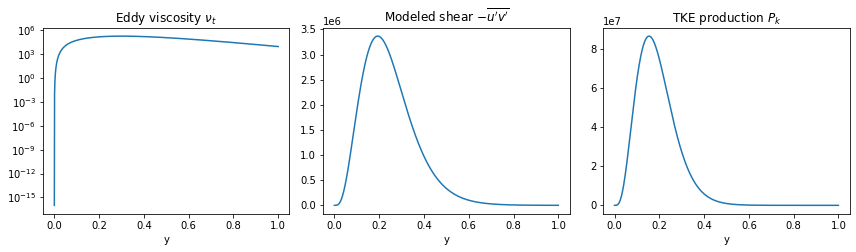

In [49]:

# 4.2 Mixing-length (Van Driest) on synthetic data
kappa, Aplus = 0.41, 26.0
y_plus = 1000.0 * y  # demonstrative scaling for students
def van_driest(y_plus, kappa=0.41, Aplus=26.0):
    return kappa * y_plus * (1.0 - np.exp(-y_plus / Aplus))

lm = van_driest(y_plus, kappa, Aplus)
nut = (lm**2) * np.abs(dUdy)
uv_model = nut * dUdy            # -u'v' (Boussinesq closure)
Pk = nut * (dUdy**2)             # TKE production

print("nu_t stats: min={:.3e}, max={:.3e}, median={:.3e}".format(np.nanmin(nut), np.nanmax(nut), np.nanmedian(nut)))
print("P_k  stats: min={:.3e}, max={:.3e}, median={:.3e}".format(np.nanmin(Pk),  np.nanmax(Pk),  np.nanmedian(Pk)))

if 'HAVE_MPL' in globals() and HAVE_MPL:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1,3, figsize=(12,3.6))
    ax[0].semilogy(y, np.maximum(nut, 1e-16)); ax[0].set_xlabel("y"); ax[0].set_title(r"Eddy viscosity $\nu_t$")
    ax[1].plot(y, uv_model); ax[1].set_xlabel("y"); ax[1].set_title(r"Modeled shear $-\overline{u'v'}$")
    ax[2].plot(y, Pk); ax[2].set_xlabel("y"); ax[2].set_title(r"TKE production $P_k$")
    fig.tight_layout(); plt.show()


In [ ]:
#Example NB 4.3. Homogenous Isotropic Turbulence Data

### 💬Example NB 4.3 — Grid (HIT-style) dataset: Reynolds stresses and TKE

This cell loads a grid style dataset that approximates homogeneous, (near-)isotropic turbulence (HIT).
It then computes Reynolds stresses and turbulent kinetic energy \(k\).

---

**1) Column inference and extraction**

The helper infers likely column names (e.g., `u, v, w`) and extracts velocity components:
$$
u \equiv u_x, \qquad v \equiv u_y, \qquad w \equiv u_z.
$$
If any component is missing, the corresponding term is skipped.

---

**2) Reynolds stresses**

Using Reynolds decomposition \( u_i = \overline{u_i} + u_i' \) with \( \overline{u_i'}=0 \),
the code computes the second-order moments:
$$
\overline{u'^2},\quad \overline{v'^2},\quad \overline{w'^2},\quad
\overline{u'v'},\quad \overline{u'w'},\quad \overline{v'w'}.
$$
These are assembled into the dictionary `RS`.

- $$\text{The normal stresses}: \overline{u'^2}, \overline{v'^2}, \overline{w'^2} \text{quantify fluctuation energy along each axis}$$  
- $$\text{The shear stresses}: \overline{u'v'}, \overline{u'w'}, \overline{v'w'}  \text{capture cross-component correlations}$$
-$$\text{For ideal HIT, we expect }
\overline{u'^2} \;\approx\; \overline{v'^2} \;\approx\; \overline{w'^2}, 
\qquad
\overline{u'v'} \;\approx\; \overline{u'w'} \;\approx\; \overline{v'w'} \;\approx\; 0.
$$

---

**3) Turbulent kinetic energy**

From the normal stresses, the single-point TKE is
$$
k \;=\; \tfrac{1}{2}\left( \overline{u'^2} + \overline{v'^2} + \overline{w'^2} \right).
$$
This is what `tke_from_components(u,v,w)` returns and is printed as
\(\texttt{[GRID] TKE k = ...}\).

---

**4) Interpretation guide**

- $$\text{Near-isotropy check: Compare the three normal stresses; ratios near 1:1:1 indicate isotropy} $$  
- $$\text{if the residual shear is Nonzero } \overline{u'v'},\text{ it may reflect weak mean shear, inhomogeneity, or sampling noise}$$  
- $$\text{Order of magnitude: k should be consistent with the scale of the velocity fluctuations observed in the dataset}$$

If the helper or dataset is missing, the cell prints  
\(\texttt{[GRID] Skipping — helper or dataset not found.}\)
and continues safely.


In [50]:

# 4.3 Grid (HIT-style) dataset — Reynolds stresses and TKE

# --- 4.3 / 4.4: Fallback for datasets that provide k (and epsilon) but not u,v,w ---

def get_col(dataset, name_candidates):
    """Return the first matching column by name (case-insensitive)."""
    if dataset is None:
        return None
    cols = [c for c in dataset["columns"]]
    lowers = {c.lower(): c for c in cols}
    for cand in name_candidates:
        if cand.lower() in lowers:
            colname = lowers[cand.lower()]
            if dataset["is_pandas"]:
                return dataset["data"][colname].to_numpy()
            else:
                return dataset["data"][colname]
    return None

def stresses_from_k(k_array):
    """HIT isotropy fallback: return mean RS and TKE from k array."""
    import numpy as np
    k_array = np.asarray(k_array, dtype=float)
    k_mean = float(np.nanmean(k_array))
    RS = {
        "uu": 2.0/3.0 * k_mean,
        "vv": 2.0/3.0 * k_mean,
        "ww": 2.0/3.0 * k_mean,
        "uv": 0.0, "uw": 0.0, "vw": 0.0,
    }
    return RS, k_mean

def print_tau_if_possible(k_array, eps_array):
    import numpy as np
    if eps_array is None:
        return
    k_array = np.asarray(k_array, dtype=float)
    eps_array = np.asarray(eps_array, dtype=float)
    tau = np.nanmean(k_array) / max(np.nanmean(eps_array), 1e-30)
    print(f"   Time scale tau = k/epsilon ≈ {tau:.3e} s")

if grid_data is None:
    print("[GRID] Dataset not found.")
else:
    u = get_col(grid_data, ["u","ux","umean"])
    v = get_col(grid_data, ["v","uy","vmean"])
    w = get_col(grid_data, ["w","uz","wmean"])
    if (u is None) and (v is None) and (w is None):
        k_arr   = get_col(grid_data, ["k","tke"])
        eps_arr = get_col(grid_data, ["epsilon","eps","dissipation"])
        if k_arr is None:
            print("[GRID] No u,v,w or k found — cannot compute stresses.")
        else:
            RS, k_mean = stresses_from_k(k_arr)
            print("[GRID] (HIT fallback) Reynolds stresses from k:", RS)
            print(f"[GRID] (HIT fallback) TKE k = {k_mean:.6e}")
            print_tau_if_possible(k_arr, eps_arr)
    else:
        # original path using components (kept for completeness)
        RS = sm4.reynolds_stresses(u, v, w)
        k  = sm4.tke_from_components(u, v, w)
        print("[GRID] Reynolds stresses:", RS)
        print(f"[GRID] TKE k = {k:.6e}")

# --- HIT ---
if hit_data is None:
    print("[HIT] Dataset not found.")
else:
    u = get_col(hit_data, ["u","ux","umean"])
    v = get_col(hit_data, ["v","uy","vmean"])
    w = get_col(hit_data, ["w","uz","wmean"])
    if (u is None) and (v is None) and (w is None):
        k_arr   = get_col(hit_data, ["k","tke"])
        eps_arr = get_col(hit_data, ["epsilon","eps","dissipation"])
        if k_arr is None:
            print("[HIT] No u,v,w or k found — cannot compute stresses.")
        else:
            RS, k_mean = stresses_from_k(k_arr)
            print("[HIT] (HIT fallback) Reynolds stresses from k:", RS)
            print(f"[HIT] (HIT fallback) TKE k = {k_mean:.6e}")
            print_tau_if_possible(k_arr, eps_arr)
            # simple isotropy ratios ≈ 1:1:1 by construction
            print("[HIT] Normal-stress ratios (uu:vv:ww) ≈ 1.00 : 1.00 : 1.00")
    else:
        RS = sm4.reynolds_stresses(u, v, w)
        k  = sm4.tke_from_components(u, v, w)
        print("[HIT] Reynolds stresses:", RS)
        print(f"[HIT] TKE k = {k:.6e}")
        uu, vv, ww = RS.get('uu', np.nan), RS.get('vv', np.nan), RS.get('ww', np.nan)
        if uu > 0:
            print("[HIT] Normal-stress ratios (uu:vv:ww) ≈ "
                  f"1.00 : {vv/uu:.2f} : {ww/uu:.2f}")
            

[GRID] (HIT fallback) Reynolds stresses from k: {'uu': 0.04612711476786181, 'vv': 0.04612711476786181, 'ww': 0.04612711476786181, 'uv': 0.0, 'uw': 0.0, 'vw': 0.0}
[GRID] (HIT fallback) TKE k = 6.919067e-02
   Time scale tau = k/epsilon ≈ 4.212e-02 s
[HIT] (HIT fallback) Reynolds stresses from k: {'uu': 0.063374017555786, 'vv': 0.063374017555786, 'ww': 0.063374017555786, 'uv': 0.0, 'uw': 0.0, 'vw': 0.0}
[HIT] (HIT fallback) TKE k = 9.506103e-02
   Time scale tau = k/epsilon ≈ 4.858e-01 s
[HIT] Normal-stress ratios (uu:vv:ww) ≈ 1.00 : 1.00 : 1.00


## 4.5 Homework Problems

In [51]:
# Homework Problems — Chapter 4: Turbulence Governing Equations

This homework reinforces your understanding of the **Reynolds-averaged momentum**, **TKE**, and **mixing-length models** using both *synthetic* and *measured-style (HIT)* datasets.

---

### **Problem 1 — Verifying the RANS Momentum Balance**

**Dataset:** Synthetic Channel (from Section 6.1)

1. Using the synthetic velocity profile \( U(y) \) and turbulent shear stress \( \overline{u'v'}(y) \), compute:
   \[
   \text{Residual} = P_g + \nu \frac{d^2U}{dy^2} - \frac{d \overline{u'v'}}{dy}
   \]
   where \( P_g = -\frac{1}{\rho}\frac{dp}{dx} \) is the mean pressure-gradient term.

2. Plot all three terms on the same axes and comment on which term dominates in the near-wall region versus the outer layer.

3. Discuss how the residual magnitude reflects the closure assumptions of the RANS equations.

---

### **Problem 2 — Mixing-Length Model and Eddy Viscosity**

**Dataset:** Synthetic Channel (from Section 4.2)

1. Implement the **Van Driest damping model**:
   \[
   \ell_m = \kappa y^+ \left(1 - e^{-y^+/A^+}\right)
   \]
   with \( \kappa = 0.41, A^+ = 26 \).  
   Compute the eddy viscosity \( \nu_t = (\ell_m)^2 \left| \frac{dU}{dy} \right| \).

2. Plot \( \nu_t(y) \) on a semi-log scale.  
   Identify the buffer layer where molecular viscosity and turbulent viscosity are comparable.

3. Using \( P_k = \nu_t \left( \frac{dU}{dy} \right)^2 \), compare the production distribution to the expected shape in a turbulent channel.

4. Comment on whether \( P_k \) peaks at the same wall-normal location as maximum turbulent shear stress.

---

### **Problem 3 — Reynolds Stresses and TKE from Grid (HIT-style) Data**

**Dataset:** `chapter4-Grid_dataset.csv` (Section 4.3)

1. From the dataset, extract \( k \) and \( \epsilon \).  
   Using the HIT assumption:
   \[
   \overline{u'^2} = \overline{v'^2} = \overline{w'^2} = \frac{2}{3}k
   \]
   compute the Reynolds stresses and compare with typical isotropic turbulence values.

2. Estimate the turbulence time scale:
   \[
   \tau = \frac{k}{\epsilon}
   \]
   and interpret its physical meaning in the context of eddy turnover time.

3. Comment on how the ratio \( \frac{k^{3/2}}{\epsilon} \) relates to the *integral length scale* and whether this grid dataset approximates high-Reynolds-number conditions.

---

### **Problem 4 — Isotropic (HIT) Dataset and Turbulence Closure**

**Dataset:** `chapter4-HIT_dataset.csv` (Section 4.4)

1. Use the TKE \( k \) to reconstruct the normal Reynolds stresses.  
   Verify isotropy by comparing the ratios \( \overline{u'^2}:\overline{v'^2}:\overline{w'^2} \).

2. Compute the normalized dissipation rate:
   \[
   C_\epsilon = \frac{\epsilon L}{k^{3/2}}
   \]
   assuming an integral scale \( L = 0.1 \, \text{m} \).  
   Discuss whether \( C_\epsilon \approx 0.9 \) as typical for HIT.

3. Explain how HIT data is used in calibrating constants in turbulence models (e.g., \( C_\mu \) in the \( k-\epsilon \) model).

---

### **Problem 5 — Extension: Coupled Energy Budget**

Combine your synthetic and HIT analyses to discuss:

1. The balance between **production**, **dissipation**, and **transport** in each dataset.
2. Which assumptions break down when moving from homogeneous isotropic turbulence to wall-bounded turbulence.
3. How the **mixing-length hypothesis** serves as a closure linking \( -\overline{u'v'} \) to the mean velocity gradient.

---

### **Deliverables**

- Submit a single Jupyter notebook or PDF with:
  - Plots for each problem.
  - Analytical discussion (short paragraphs).
  - Annotated Python code cells where relevant.
- Use the companion notebook functions (from `chapter4_utils.py`) for data handling and TKE computation.

---

> 💡 **Hint for students:** Use `np.gradient()` carefully and normalize profiles by friction velocity \( u_\tau \) or \( k^{1/2} \) when comparing shapes.


SyntaxError: invalid syntax (<ipython-input-51-a9c6e118db3c>, line 3)

# 4.6: Governing Equations for Buoyancy-generated Turbulence
###Buoyancy Production, Scalar Variance, and Mixing-Length — Rayleigh–Bénard Example

This notebook illustrates buoyancy production in the TKE budget and scalar-variance production
via gradient–diffusion closures, then applies a **mixing-length** model to a simple
Rayleigh–Bénard (RB) configuration (heated from below, cooled from above).

**Closures used** (Boussinesq):
- Scalar flux: $\overline{u_j'\theta'} = -\kappa_t\,\partial_j\overline{\theta}$, with $\kappa_t = \nu_t/\mathrm{Pr}_t$.
- Buoyancy production in TKE: $P_b = -\dfrac{\nu_t}{\mathrm{Pr}_t} N^2$, with $N^2 = g\alpha_T\,\partial_y\overline{\theta}$.
- Dissipation (local): $\varepsilon = C_\varepsilon\,\dfrac{k^{3/2}}{\ell_m}$.
- Eddy viscosity (mixing-length / k-based): $\nu_t = C_m\,\ell_m\sqrt{k}$, with $C_m\equiv C_\varepsilon^{1/3}$.
- Scalar-variance production: $\mathcal{P}_\vartheta = \kappa_t (\partial_y\overline{\theta})^2$.

Under **local equilibrium** (steady, 1-D, transport neglected): $P_b \approx \varepsilon$.
Combining gives a closed algebraic relation for $k$:
\begin{equation}
k(y) \;=\; \frac{C_m}{C_\varepsilon}\,\frac{\ell_m(y)^2}{\mathrm{Pr}_t}\,\big|N^2(y)\big|.
\end{equation}
This is convenient for buoyancy-dominated regions with weak mean shear.


## 4.7  Example NB 4.5. Rayleigh Bernard Case with Mixing Length Model
$$\text{We take a vertical domain} 0\le y\le H \text{ with bottom temperature}  T_b \text{ and top temperature } T_t$$
$$\text{The conductive mean profile is  } \overline{T}(y)=T_b - (\Delta T/H),y with \Delta T=T_b-T_t>0$$.
$$  \partial_y\overline{T}=-\Delta T/H$$
$$N^2=g\alpha_T\,\partial_y\overline{T}= -g\alpha_T\,\Delta T/H<0  \text{:unstable}$$.

c_ell = 0.25  # dimensionless
lm = c_ell * H * np.sqrt((y/H) * (1.0 - y/H))

### Local-equilibrium k from Pb = eps: k = (Cm/Ceps) * (lm^2/Pr_t) * |N2|
k_local = (Cm/Ceps) * (lm**2 / Pr_t) * np.abs(N2)

### Eddy viscosity and turbulent diffusivity
nu_t = Cm * lm * np.sqrt(np.maximum(k_local, 0.0))
kap_t = nu_t / Pr_t

### Budget terms
Pb = - nu_t * N2 / Pr_t                     # >0 for unstable (N2<0)
eps = Ceps * (k_local**1.5) / np.maximum(lm, 1e-12)  # avoid divide-by-zero at walls
Pth = kap_t * (dTdy**2)                     # scalar-variance production

fig, ax = plt.subplots()
ax.plot(y/H, lm, label='mixing length $\\ell_m$')
ax.set_xlabel('y/H'); ax.set_ylabel('Length [m]')
ax.set_title('Wall-aware Mixing Length')
ax.legend(frameon=False)
plt.show()

fig, ax = plt.subplots()
ax.plot(y/H, k_local)
ax.set_xlabel('y/H'); ax.set_ylabel('k [m$^2$/s$^2$]')
ax.set_title('Local-Equilibrium TKE from Buoyancy')
plt.show()

fig, ax = plt.subplots()
ax.plot(y/H, Pb, label='$P_b$')
ax.plot(y/H, eps, label='$\\varepsilon$')
ax.set_xlabel('y/H'); ax.set_ylabel('[m$^2$/s$^3$]')
ax.set_title('TKE Budget Terms: Buoyancy and Dissipation')
ax.legend(frameon=False)
plt.show()

fig, ax = plt.subplots()
ax.plot(y/H, Pth)
ax.set_xlabel('y/H'); ax.set_ylabel(r'$\mathcal{P}_\vartheta$ [K$^2$/s]')
ax.set_title('Scalar-Variance Production')
plt.show()




In [57]:
# Physical / modeling parameters
g = 9.81            # m/s^2
alpha_T = 3.0e-3    # 1/K (illustrative)
nu = 1.0e-6         # m^2/s (kinematic viscosity)
kappa = 1.4e-7      # m^2/s (thermal diffusivity)
Pr = nu/kappa       # molecular Prandtl

H = 0.2             # m, fluid layer height
Tb = 310.0          # K
Tt = 300.0          # K
dT = Tb - Tt        # K (>0)

Ceps = 0.6          # C_epsilon
Cm   = Ceps**(1.0/3.0)
Pr_t = 0.9          # turbulent Prandtl
sig_k = 1.0         # gradient-diffusion for k (not used in local eq)

# Grid in y
Ny = 300
y  = np.linspace(0.0, H, Ny)

# Mean temperature profile and N^2
Tbar = Tb - dT * (y/H)
dTdy = - dT / H * np.ones_like(y)
N2   = g * alpha_T * dTdy  # Negative in RB (unstable)

# Rayleigh number
Ra = g * alpha_T * dT * H**3 / (nu * kappa)
print(f"Prandtl = {Pr:.2f},  Rayleigh = {Ra:.3e}")

Prandtl = 7.14,  Rayleigh = 1.682e+10


## 2) Mixing length and closures
$$ \text{We choose a wall-aware mixing length that vanishes at plates, e.g}
\ell_m(y) = c_\ell\,H\,\sqrt{(y/H)(1-y/H)}, c_\ell\in(0,1).
\text{Then we compute k(y) from the local-equilibrium relation, and derive}
\nu_t(y)=C_m\,\ell_m\sqrt{k}, \kappa_t=\nu_t/\mathrm{Pr}_t, \text{and
the budget terms} P_b(y), \varepsilon(y), \mathcal{P}_\vartheta(y)$$.

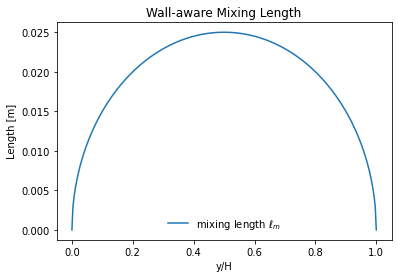

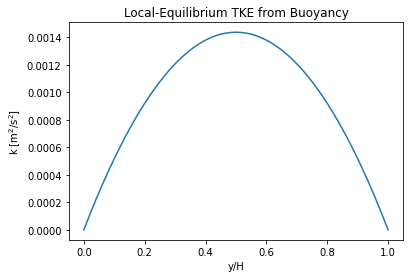

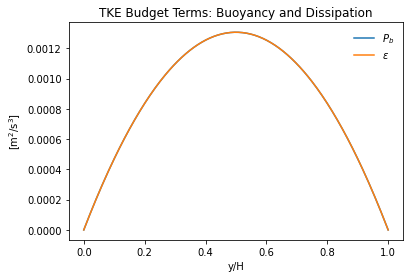

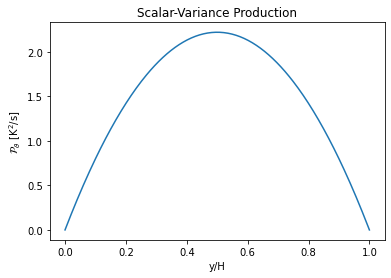

In [58]:
c_ell = 0.25  # dimensionless
lm = c_ell * H * np.sqrt((y/H) * (1.0 - y/H))

# Local-equilibrium k from Pb = eps: k = (Cm/Ceps) * (lm^2/Pr_t) * |N2|
k_local = (Cm/Ceps) * (lm**2 / Pr_t) * np.abs(N2)

# Eddy viscosity and turbulent diffusivity
nu_t = Cm * lm * np.sqrt(np.maximum(k_local, 0.0))
kap_t = nu_t / Pr_t

# Budget terms
Pb = - nu_t * N2 / Pr_t                     # >0 for unstable (N2<0)
eps = Ceps * (k_local**1.5) / np.maximum(lm, 1e-12)  # avoid divide-by-zero at walls
Pth = kap_t * (dTdy**2)                     # scalar-variance production

fig, ax = plt.subplots()
ax.plot(y/H, lm, label='mixing length $\\ell_m$')
ax.set_xlabel('y/H'); ax.set_ylabel('Length [m]')
ax.set_title('Wall-aware Mixing Length')
ax.legend(frameon=False)
plt.show()

fig, ax = plt.subplots()
ax.plot(y/H, k_local)
ax.set_xlabel('y/H'); ax.set_ylabel('k [m$^2$/s$^2$]')
ax.set_title('Local-Equilibrium TKE from Buoyancy')
plt.show()

fig, ax = plt.subplots()
ax.plot(y/H, Pb, label='$P_b$')
ax.plot(y/H, eps, label='$\\varepsilon$')
ax.set_xlabel('y/H'); ax.set_ylabel('[m$^2$/s$^3$]')
ax.set_title('TKE Budget Terms: Buoyancy and Dissipation')
ax.legend(frameon=False)
plt.show()

fig, ax = plt.subplots()
ax.plot(y/H, Pth)
ax.set_xlabel('y/H'); ax.set_ylabel(r'$\mathcal{P}_\vartheta$ [K$^2$/s]')
ax.set_title('Scalar-Variance Production')
plt.show()
